In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [35]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.shape



(7043, 21)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [39]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [40]:
df["Churn"].value_counts(normalize=True)




Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

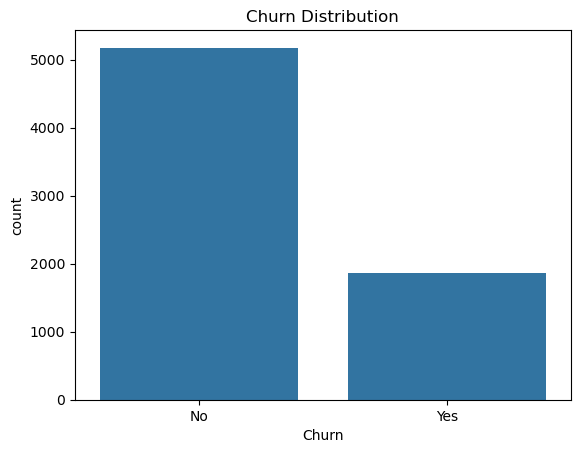

In [41]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

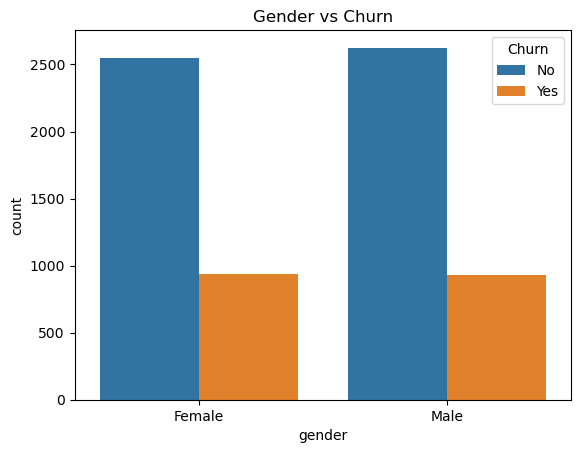

In [42]:
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.show()


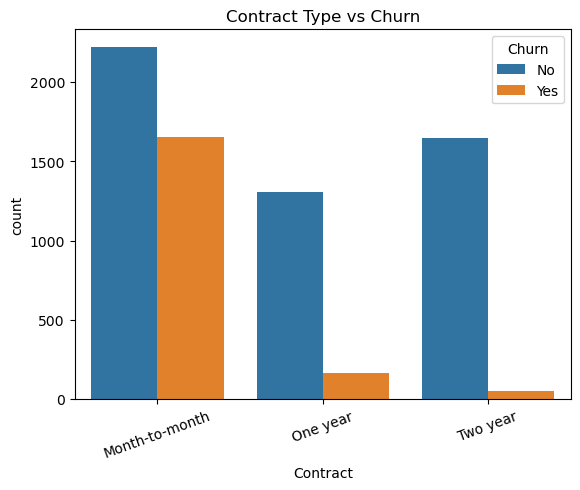

In [43]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=20)
plt.title("Contract Type vs Churn")
plt.show()


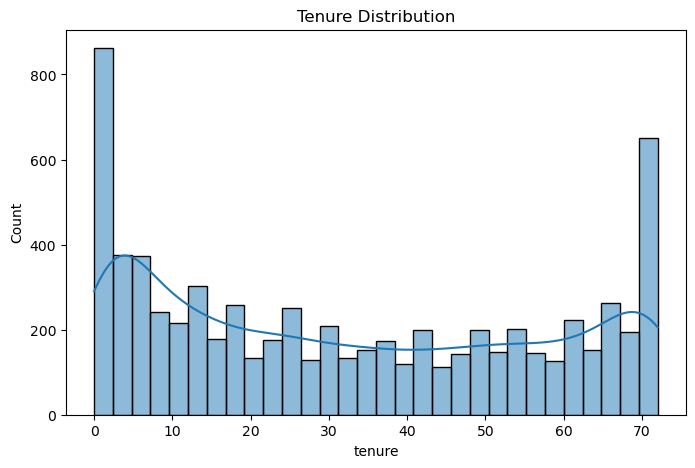

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


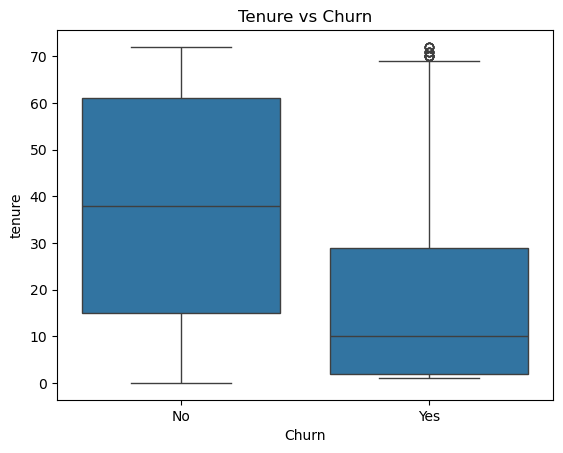

In [45]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


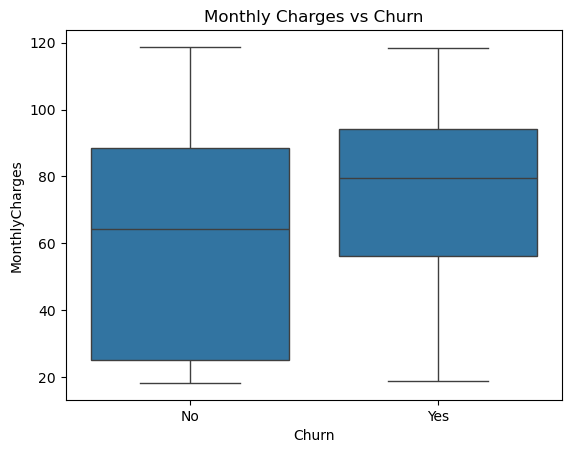

In [46]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


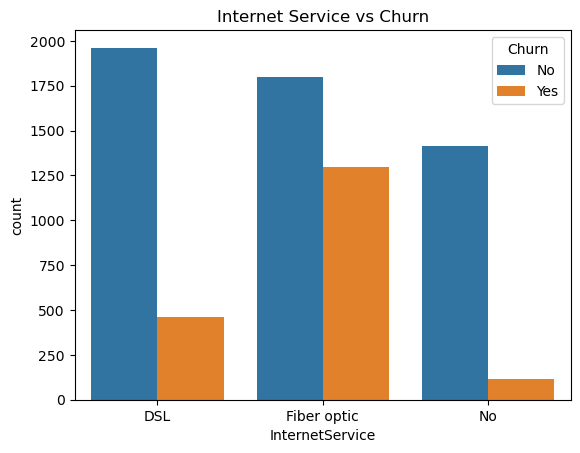

In [47]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()

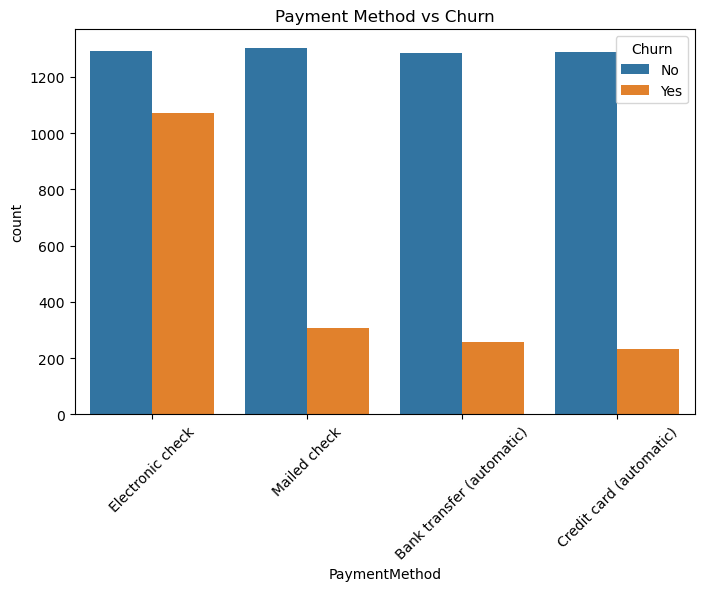

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


In [ ]:
# Around 26% of customers churn, while 74% remain
# The dataset is slightly imbalanced, so accuracy alone is not sufficient
# Month-to-month contracts have the highest churn rate
# One-year and two-year contracts significantly reduce churn
# Customers with short tenure are more likely to churn
# Early months are the most critical period for customer retention
# Higher monthly charges are associated with higher churn
# Customers using Electronic Check show the highest churn
# Automatic payment methods (credit card / bank transfer) have the lowest churn
# Fiber optic internet users churn more than DSL users
# Customers without internet service have the lowest churn
# TotalCharges is highly correlated with tenure (multicollinearity risk)
# Gender has little to no effect on churn
# Customers with a partner or dependents are less likely to churn
# Behavioral and financial features are more predictive than demographic features

In [49]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\Souq al computer\AppData\Local\Temp\ipykernel_18180\617195598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [50]:
df.drop("customerID", axis=1, inplace=True)


In [51]:
df = pd.get_dummies(df, drop_first=True)

In [52]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]



In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
lr_base = LogisticRegression(max_iter=1000)
lr_base.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
y_pred_base = lr_base.predict(X_test)

In [58]:
acc_base = accuracy_score(y_test, y_pred_base)
prec_base = precision_score(y_test, y_pred_base)
rec_base = recall_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)


In [60]:
print("Accuracy :", acc_base)
print("Precision:", prec_base)
print("Recall   :", rec_base)
print("F1-score :", f1_base)


Accuracy : 0.8069552874378992
Precision: 0.6583850931677019
Recall   : 0.5668449197860963
F1-score : 0.6091954022988506


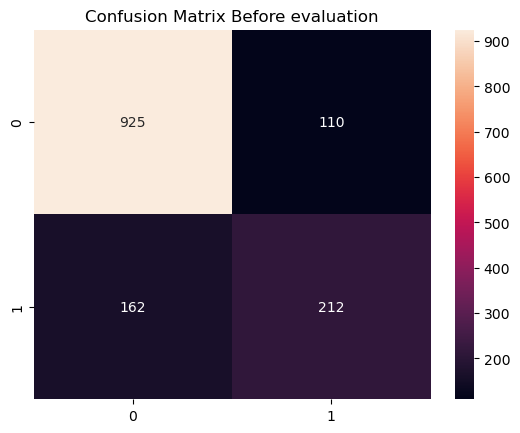

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred_base),
            annot=True, fmt="d")
plt.title("Confusion Matrix Before evaluation")
plt.show()


In [65]:
lr_improved = LogisticRegression(max_iter=1000,class_weight="balanced",penalty="l1",solver="liblinear")

In [66]:
lr_improved.fit(X_train, y_train)

y_pred_improved = lr_improved.predict(X_test)


In [67]:
acc_imp = accuracy_score(y_test, y_pred_improved)
prec_imp = precision_score(y_test, y_pred_improved)
rec_imp = recall_score(y_test, y_pred_improved)
f1_imp = f1_score(y_test, y_pred_improved)

In [68]:
print("Accuracy :", acc_imp)
print("Precision:", prec_imp)
print("Recall   :", rec_imp)
print("F1-score :", f1_imp)

Accuracy : 0.7381121362668559
Precision: 0.504302925989673
Recall   : 0.7834224598930482
F1-score : 0.6136125654450262


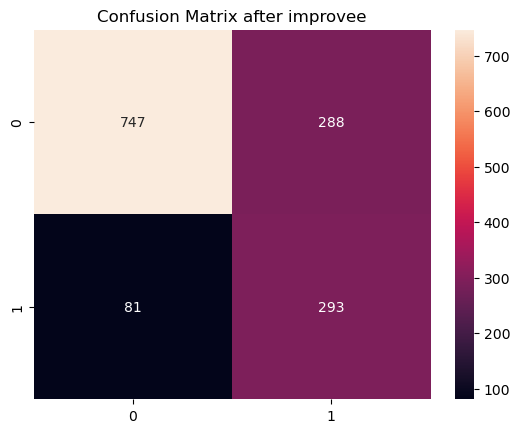

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred_improved),
            annot=True, fmt="d")
plt.title("Confusion Matrix after improvee")
plt.show()


In [80]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Before Improvement": [acc_base, prec_base, rec_base, f1_base],
    "After Improvement": [acc_imp, prec_imp, rec_imp, f1_imp]
})

In [81]:
print(metrics_df)

      Metric  Before Improvement  After Improvement
0   Accuracy            0.806955           0.738112
1  Precision            0.658385           0.504303
2     Recall            0.566845           0.783422
3   F1-score            0.609195           0.613613
